## Income generated from Airbnb rentals

Now that we know which are the neighbourhoods offering more rental sites and which are the average prices, we are interested in calculating which neighborhoods make the most money from these rental sites. For this action, we will leverage the data in the *listings* and the *calendar* tables contained in the dataset.

In [1]:
# Import libraries and tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

calendar_df = pd.read_csv('./boston_airbnb/calendar.csv')
listings_df = pd.read_csv('./boston_airbnb/listings.csv')

The *calendar* dataframe contains information about the availability of listings from Sep 2016 through September 2017. For simplicity, we are assuming that those listings marked with avaliability "f" are booked on a certain date, so we will exclude those marked with availabilty "t". 

With the booking volume and the price, we can calculate the income generated by a certain listing and gruop listings by neigbhourhood. 

The price for booked listings is not shown, so we will retrieve it from the *listings* dataframe.

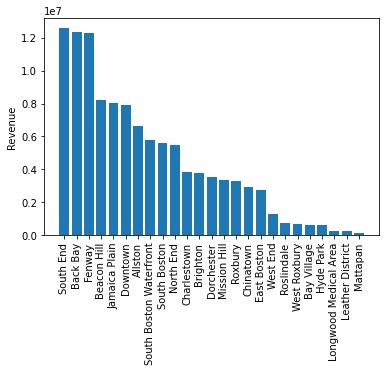

In [4]:
# Drop available (not booked) listings and rename column to match name in listings dataframe
booked_dates_df = calendar_df[calendar_df['available'] == 'f'].dropna(axis=1).drop(columns='available')
booked_dates_df = booked_dates_df.rename(columns={'listing_id':'id'})

# Retrieve id, price and neighbourhood from lsitings dataframe
price_listings = listings_df[['id','price','neighbourhood_cleansed']]

# Merge tables to append the price to the calendar dataframe
booked_dates_df = booked_dates_df.merge(price_listings, on='id', how='outer')

# Fix price format to convert to numeric values
booked_dates_df['price'] = booked_dates_df['price'].str[1:]
booked_dates_df['price'] = booked_dates_df['price'].str.replace(',','')
booked_dates_df['price'] =pd.to_numeric(booked_dates_df['price'])

# Drop missing values
booked_dates_df = booked_dates_df.dropna(axis=0)

# Group table by Neighbourhood in order for prices per night to sum up and yield the total income
# earned by the booked properties

booked_dates_df = booked_dates_df.groupby('neighbourhood_cleansed').sum().sort_values(by='price', ascending=False)

#Plot findings
plt.bar(booked_dates_df.index,booked_dates_df['price'])
plt.xticks(booked_dates_df.index, rotation='vertical')
plt.ylabel('Revenue')
plt.show()